<a href="https://colab.research.google.com/github/thanhtruongphan/End-project-report-AI/blob/main/create_model_Realtime_Gender_detection_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **End project**
# **_____________**
## **PhanThanhTruong - 19146293**

## **'Create model for Realtime gender detection using CNN'**

# **setup environment**


In [ ]:
# Import dependencies
import matplotlib.pyplot as plt
from matplotlib.image import imread
from keras.models import Sequential,load_model,Model
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import Input
from tensorflow.keras.optimizers import Adam

# **load datasets**

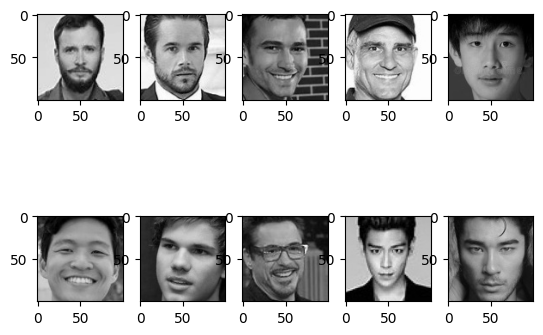

In [ ]:
folder = '/content/drive/MyDrive/A_HOC_TAP/Nam_4_Hoc_ky_2/Artificial_Intelligence/Code_AI/projects/photos/'
for i in range(10):
  plt.subplot(2,5,i+1)
  filename = folder + 'male_0_'+str(i)+'.jpg'
  img = plt.imread(filename)
  plt.imshow(img)
plt.show()

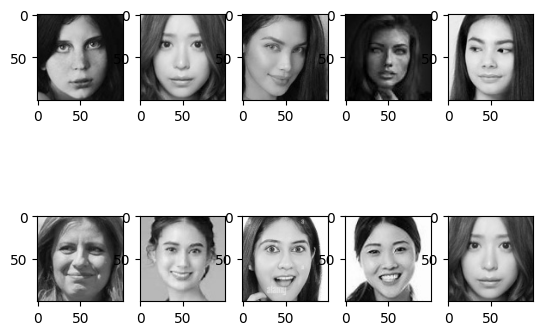

In [ ]:
folder = '/content/drive/MyDrive/A_HOC_TAP/Nam_4_Hoc_ky_2/Artificial_Intelligence/Code_AI/projects/photos/'
for i in range(10):
  plt.subplot(2,5,i+1)
  filename = folder + 'female_1_'+str(i)+'.jpg'
  img = plt.imread(filename)
  plt.imshow(img)
plt.show()

# **hashtag**

In [ ]:
from os import listdir
from os.path import isdir
from numpy import asarray
from numpy import save
from keras.utils import load_img, img_to_array
folder = '/content/drive/MyDrive/A_HOC_TAP/Nam_4_Hoc_ky_2/Artificial_Intelligence/Code_AI/projects/photos/'
photos, labels = list(), list()
for file in listdir(folder):
  output = 0.0
  if file.startswith('female'):
    output = 1
  if file.startswith('male'):
    output = 2
  img =load_img(folder+file)
  photo = img_to_array(img)
  photos.append(photo)
  labels.append(output)
photos = asarray(photos)
labels = asarray(labels)
print(photos.shape,labels.shape)
save('/content/drive/MyDrive/A_HOC_TAP/Nam_4_Hoc_ky_2/Artificial_Intelligence/Code_AI/projects/gender_detection_photos.npy', photos)
save('/content/drive/MyDrive/A_HOC_TAP/Nam_4_Hoc_ky_2/Artificial_Intelligence/Code_AI/projects/gender_detection_labels.npy', labels)

(300, 100, 100, 3) (300,)


In [ ]:
import numpy as np
x_train = np.load('/content/drive/MyDrive/A_HOC_TAP/Nam_4_Hoc_ky_2/Artificial_Intelligence/Code_AI/projects/gender_detection_photos.npy')
y_train = np.load('/content/drive/MyDrive/A_HOC_TAP/Nam_4_Hoc_ky_2/Artificial_Intelligence/Code_AI/projects/gender_detection_labels.npy')
print(photos.shape,labels.shape)

(300, 100, 100, 3) (300,)


In [ ]:
x_train = x_train.astype('float32')/255
from keras.utils import to_categorical
y_train = to_categorical(y_train,10)

# **CNN architecture**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D,Normalization,LeakyReLU
from keras.optimizers import Adam

#32 lan tich chap
model = Sequential()
model.add(Conv2D(32,kernel_size = (3,3),activation = 'relu',input_shape=(100,100,3),padding='Same'))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Dropout(0.25))

#64 lan tich chap
model.add(Conv2D(64,(3,3),activation ='relu',padding ='same'))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Dropout(0.25))

#128 lan tich chap
model.add(Conv2D(128,(3,3),activation ='relu',padding ='same'))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Dropout(0.25))

# #256 lan tich chap
# model.add(Conv2D(256,(3,3),activation ='relu',padding ='same'))
# model.add(MaxPooling2D((2,2),padding='same'))
# model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128,activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(10,activation='sigmoid'))

from keras.losses import categorical_crossentropy
model.compile(loss = categorical_crossentropy,optimizer = Adam(),metrics=['accuracy'])
model.summary()
train = model.fit(x_train,y_train,batch_size=200,epochs = 60,verbose = 1)
model.save('/content/drive/MyDrive/projects/gender_detection3.h5')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 100, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 50, 50, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 50, 50, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 50, 50, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 25, 25, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 25, 25, 64)        0

In [ ]:
from tensorflow import keras
import matplotlib.pyplot as plt
from keras.utils import load_img
from keras.utils.image_utils import img_to_array
import numpy as np

In [ ]:
model = keras.models.load_model('/content/drive/MyDrive/A_HOC_TAP/Nam_4_Hoc_ky_2/Artificial_Intelligence/Code_AI/projects/gender_detection2.h5')
# model.save('/content/drive/projects/gender_detection2.model')


1/1 [==============================] - 0s 388ms/step


'female'

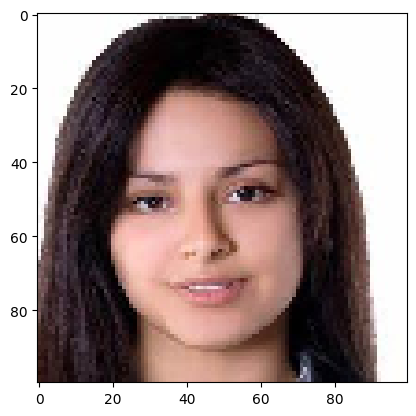

In [ ]:
gender = {1: 'female',2:'male'}
img = load_img("/content/drive/MyDrive/A_HOC_TAP/Nam_4_Hoc_ky_2/Artificial_Intelligence/Code_AI/projects/test_image/female2.jpeg",target_size=(100,100))
plt.imshow(img)
img = img_to_array(img)
img=img.reshape(1,100,100,3)
img = img.astype('float32')
img =img/255
result  = np.argmax(model.predict(img),axis=1)
gender[result[0]]

1/1 [==============================] - 0s 17ms/step


'male'

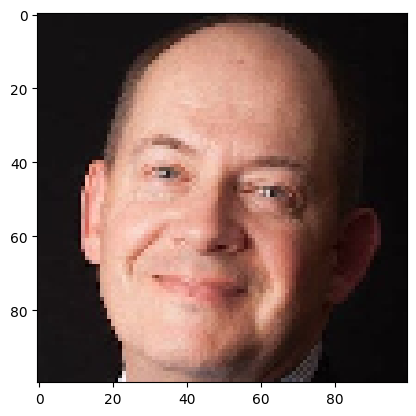

In [ ]:

img = load_img("/content/drive/MyDrive/A_HOC_TAP/Nam_4_Hoc_ky_2/Artificial_Intelligence/Code_AI/projects/test_image/man1.jpeg",target_size=(100,100))
plt.imshow(img)
img = img_to_array(img)
img=img.reshape(1,100,100,3)
img = img.astype('float32')
img =img/255
result  = np.argmax(model.predict(img),axis=1)
gender[result[0]]

1/1 [==============================] - 0s 32ms/step


'male'

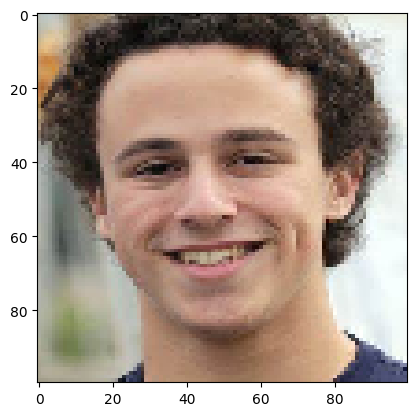

In [ ]:
img = load_img("/content/drive/MyDrive/A_HOC_TAP/Nam_4_Hoc_ky_2/Artificial_Intelligence/Code_AI/projects/test_image/man2.jpeg",target_size=(100,100))
plt.imshow(img)
img = img_to_array(img)
img=img.reshape(1,100,100,3)
img = img.astype('float32')
img =img/255
result  = np.argmax(model.predict(img),axis=1)
gender[result[0]]

In [ ]:
from keras.models import load_model
from PIL import Image
import numpy as np
import cv2

#the following are to do with this interactive notebook code

%matplotlib inline 
from matplotlib import pyplot as plt # this lets you draw inline pictures in the notebooks
import pylab # this allows you to control figure size 
pylab.rcParams['figure.figsize'] = (10.0, 8.0) # this controls figure size in the notebook


In [ ]:
# load and evaluate a saved model
export_dir='/content/drive/MyDrive/A_HOC_TAP/Nam_4_Hoc_ky_2/Artificial_Intelligence/Code_AI/projects/gender_detection2.h5'
gender_model = load_model(export_dir)

# summarize model.
gender_model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_52 (Conv2D)          (None, 100, 100, 32)      896       
                                                                 
 max_pooling2d_52 (MaxPoolin  (None, 50, 50, 32)       0         
 g2D)                                                            
                                                                 
 dropout_67 (Dropout)        (None, 50, 50, 32)        0         
                                                                 
 conv2d_53 (Conv2D)          (None, 50, 50, 64)        18496     
                                                                 
 max_pooling2d_53 (MaxPoolin  (None, 25, 25, 64)       0         
 g2D)                                                            
                                                                 
 dropout_68 (Dropout)        (None, 25, 25, 64)      

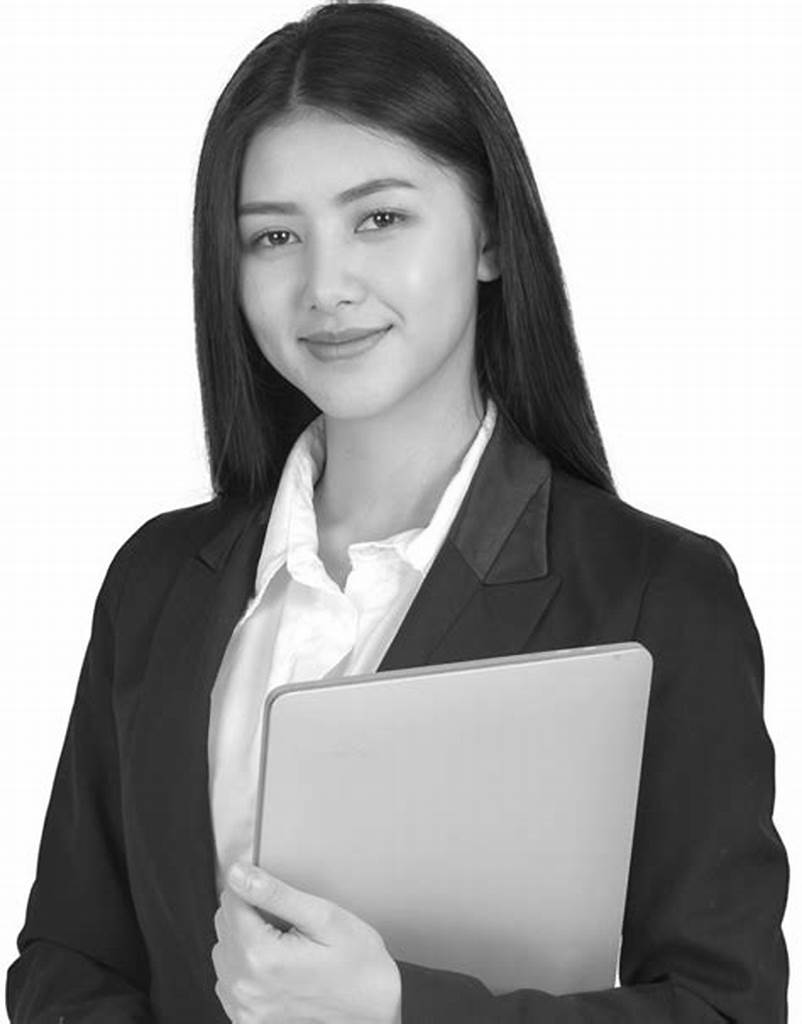

In [ ]:
import cv2 
from google.colab.patches import cv2_imshow
image = cv2.imread("/content/drive/MyDrive/A_HOC_TAP/Nam_4_Hoc_ky_2/Artificial_Intelligence/Code_AI/projects/test_image/fe2.jpeg",0)
cv2_imshow(image)

True

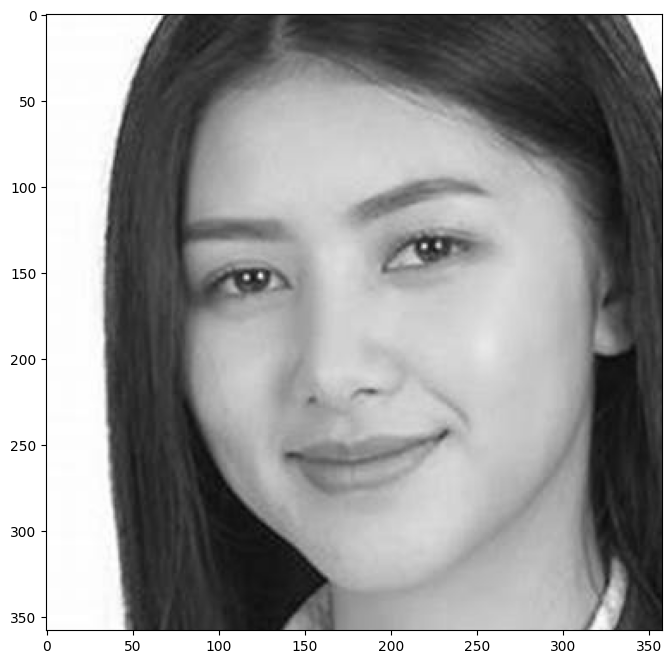

In [ ]:
import matplotlib.pyplot as plt
from keras.utils import load_img
from keras.utils.image_utils import img_to_array

gender = {1: 'female',2:'male'}

test_image = cv2.imread('/content/drive/MyDrive/A_HOC_TAP/Nam_4_Hoc_ky_2/Artificial_Intelligence/Code_AI/projects/test_image/fe2.jpeg')
gray = cv2.cvtColor(test_image,cv2.COLOR_BGR2GRAY)
face_cascade = cv2.CascadeClassifier('/content/drive/MyDrive/A_HOC_TAP/Nam_4_Hoc_ky_2/Artificial_Intelligence/Code_AI/projects/haarcascades/haarcascade_frontalface_default.xml')
faces = face_cascade.detectMultiScale(gray, 1.3, 5)

i = 0

for (x,y,w,h) in faces:
  i = i+1
  cv2.rectangle(test_image,(x,y),(x+w,y+h),(203,12,255),2)

  img_gray=gray[(y-30):(y+h+30),(x-30):(x+w+30)]

  # gender_img = cv2.resize(img_gray, (100,100), interpolation = cv2.INTER_AREA)
  # gender_image_array = img_to_array(gender_img)
  # gender_image_array=gender_image_array.reshape(1,100,100,-1)
  # gender_image_array = gender_image_array.astype('float64')
  # gender_image_array = gender_image_array/255
  # result  = np.argmax(model.predict(gender_image_array),axis=1)
  # gender[result[0]]


  # output_str = str(i) + ": "+  output_gender + ', '+ output_age + ', '+ output_emotion
  # print(output_str)
  
  # col = (0,255,0)

  # cv2.putText(test_image, str(i),(x,y),cv2.FONT_HERSHEY_SIMPLEX,1,col,2)

# plt.imshow(cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB))
plt.imshow(cv2.cvtColor(img_gray, cv2.COLOR_BGR2RGB))
cv2.imwrite('fem1.jpg',img_gray)

1/1 [==============================] - 0s 27ms/step


'female'

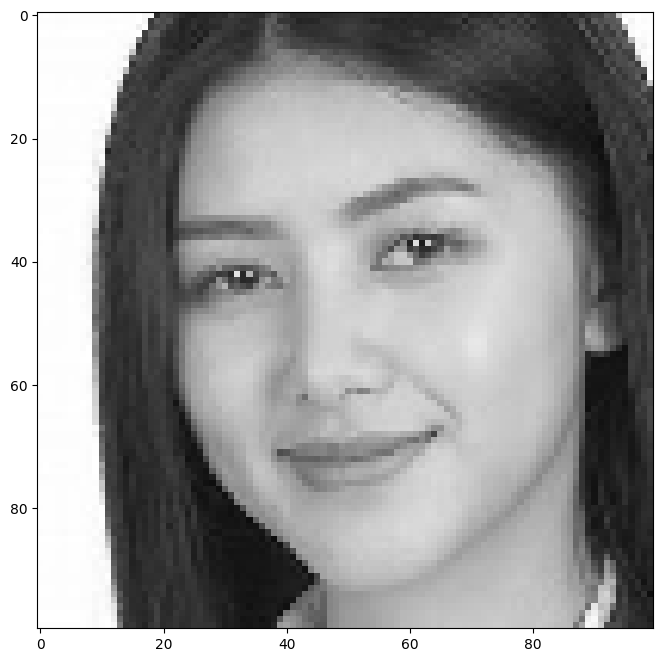

In [ ]:
import matplotlib.pyplot as plt
from keras.utils import load_img
from keras.utils.image_utils import img_to_array
import numpy as np
vat = {1: 'female',2:'male'}
img = load_img("/content/drive/MyDrive/A_HOC_TAP/Nam_4_Hoc_ky_2/Artificial_Intelligence/Code_AI/projects/test_image/fem1.jpg",target_size=(100,100))
plt.imshow(img)
img = img_to_array(img)
img=img.reshape(1,100,100,3)
img = img.astype('float64')
img =img/255
result  = np.argmax(model.predict(img),axis=1)
vat[result[0]]

# **gop 2 chuong trinh tren**

1/1 [==============================] - 0s 22ms/step


'female'

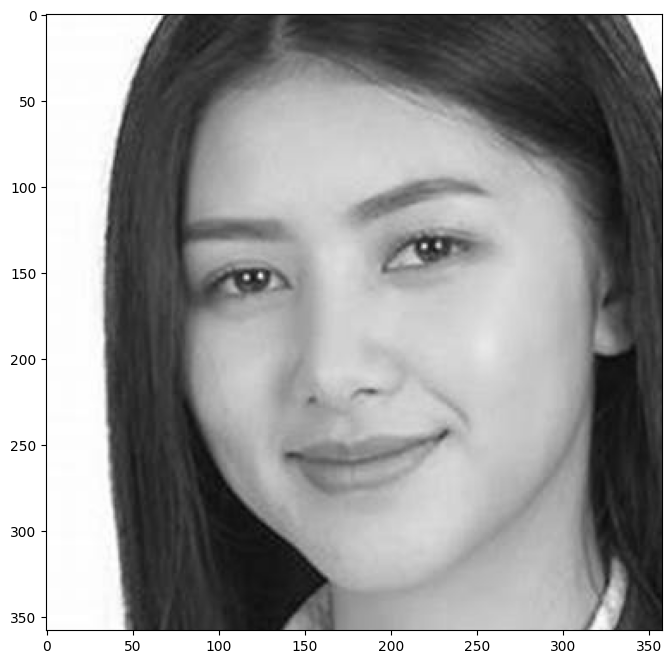

In [ ]:
import matplotlib.pyplot as plt
from keras.utils import load_img
from keras.utils.image_utils import img_to_array
import numpy as np
vat = {1: 'female',2:'male'}

test_image = cv2.imread('/content/drive/MyDrive/A_HOC_TAP/Nam_4_Hoc_ky_2/Artificial_Intelligence/Code_AI/projects/test_image/fe2.jpeg')
gray = cv2.cvtColor(test_image,cv2.COLOR_BGR2GRAY)
face_cascade = cv2.CascadeClassifier('/content/drive/MyDrive/A_HOC_TAP/Nam_4_Hoc_ky_2/Artificial_Intelligence/Code_AI/projects/haarcascades/haarcascade_frontalface_default.xml')
faces = face_cascade.detectMultiScale(gray, 1.3, 5)

for (x,y,w,h) in faces:
  cv2.rectangle(test_image,(x,y),(x+w,y+h),(203,12,255),2)

  img_gray=gray[(y-30):(y+h+30),(x-30):(x+w+30)]
  cv2.imwrite('/content/drive/MyDrive/A_HOC_TAP/Nam_4_Hoc_ky_2/Artificial_Intelligence/Code_AI/projects/test_image/fema2.jpg',img_gray)
  img = load_img("/content/drive/MyDrive/A_HOC_TAP/Nam_4_Hoc_ky_2/Artificial_Intelligence/Code_AI/projects/test_image/fema2.jpg",target_size=(100,100))
  plt.imshow(img)
  img = img_to_array(img)
  img=img.reshape(1,100,100,3)
  img = img.astype('float64')
  img =img/255
  result  = np.argmax(model.predict(img),axis=1)
  plt.imshow(cv2.cvtColor(img_gray, cv2.COLOR_BGR2RGB))
vat[result[0]]

1/1 [==============================] - 0s 111ms/step
text female


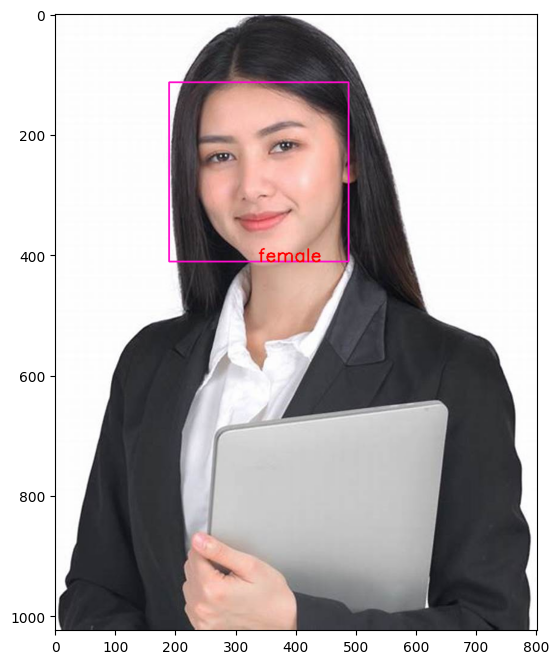

In [ ]:
# làm được hiển thị chữ trên hình

import matplotlib.pyplot as plt
from keras.utils import load_img
from keras.utils.image_utils import img_to_array
import numpy as np
vat = {1: 'female',2:'male'}

test_image = cv2.imread('/content/drive/MyDrive/A_HOC_TAP/Nam_4_Hoc_ky_2/Artificial_Intelligence/Code_AI/projects/test_image/fe2.jpeg')
gray = cv2.cvtColor(test_image,cv2.COLOR_BGR2GRAY)
face_cascade = cv2.CascadeClassifier('/content/drive/MyDrive/A_HOC_TAP/Nam_4_Hoc_ky_2/Artificial_Intelligence/Code_AI/projects/haarcascades/haarcascade_frontalface_default.xml')
faces = face_cascade.detectMultiScale(gray, 1.3, 5)

for (x,y,w,h) in faces:
  cv2.rectangle(test_image,(x,y),(x+w,y+h),(203,12,255),2)

  img_gray = gray[(y-30):(y+h+30),(x-30):(x+w+30)]
  cv2.imwrite('/content/drive/MyDrive/projects/test_image/fema2.jpg',img_gray)
  img = load_img("/content/drive/MyDrive/projects/test_image/fema2.jpg",target_size=(100,100))
  # img = img_gray
  plt.imshow(img)
  img = img_to_array(img)
  img = img.reshape(1,100,100,3)
  img = img.astype('float64')
  img =img/255
  result  = np.argmax(model.predict(img),axis=1)
  # plt.imshow(cv2.cvtColor(img_gray, cv2.COLOR_BGR2RGB))
  text = str(vat[result[0]])
  cv2.putText(test_image,text,(x+w-150,y+h),cv2.FONT_HERSHEY_SIMPLEX,1,(0,0,255),2)
plt.imshow(cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB))

print('text',text)


1/1 [==============================] - 0s 28ms/step


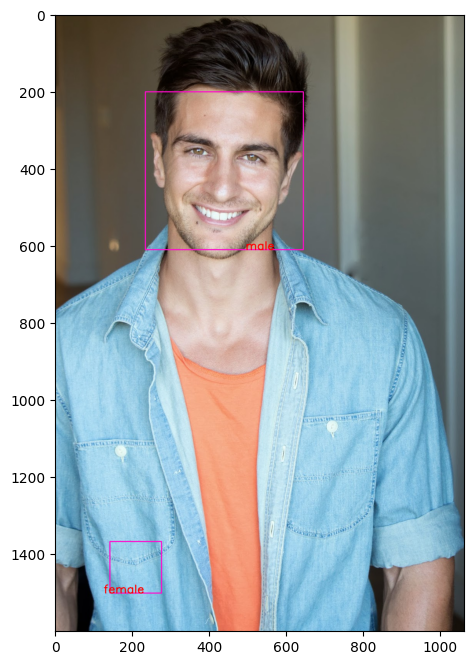

In [ ]:
# làm được hiển thị chữ trên hình

import matplotlib.pyplot as plt
from keras.utils import load_img
from keras.utils.image_utils import img_to_array
import numpy as np
vat = {1: 'female',2:'male'}

test_image = cv2.imread('/content/drive/MyDrive/A_HOC_TAP/Nam_4_Hoc_ky_2/Artificial_Intelligence/Code_AI/projects/test_image/man6.jpeg')
gray = cv2.cvtColor(test_image,cv2.COLOR_BGR2GRAY)
face_cascade = cv2.CascadeClassifier('/content/drive/MyDrive/A_HOC_TAP/Nam_4_Hoc_ky_2/Artificial_Intelligence/Code_AI/projects/haarcascades/haarcascade_frontalface_default.xml')
faces = face_cascade.detectMultiScale(gray, 1.3, 5)

for (x,y,w,h) in faces:
  cv2.rectangle(test_image,(x,y),(x+w,y+h),(203,12,255),2)

  img_gray = gray[(y-10):(y+h+10),(x-10):(x+w+10)]
  cv2.imwrite('/content/drive/MyDrive/A_HOC_TAP/Nam_4_Hoc_ky_2/Artificial_Intelligence/Code_AI/projects/test_image/man6_.jpg',img_gray)
  img = load_img("/content/drive/MyDrive/A_HOC_TAP/Nam_4_Hoc_ky_2/Artificial_Intelligence/Code_AI/projects/test_image/man6_.jpg",target_size=(100,100))
  # img = img_gray
  plt.imshow(img)
  img = img_to_array(img)
  img = img.reshape(1,100,100,3)
  img = img.astype('float64')
  img =img/255
  result  = np.argmax(model.predict(img),axis=1)
  # plt.imshow(cv2.cvtColor(img_gray, cv2.COLOR_BGR2RGB))
  text = str(vat[result[0]])
  cv2.putText(test_image,text,(x+w-150,y+h),cv2.FONT_HERSHEY_SIMPLEX,1,(0,0,255),2)
plt.imshow(cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB))



1/1 [==============================] - 0s 89ms/step


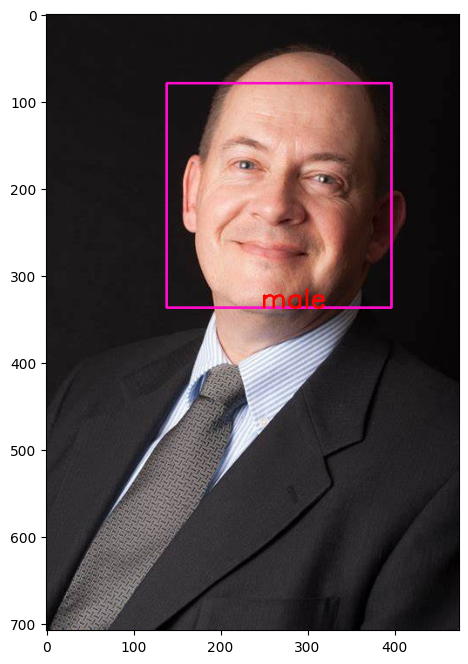

In [ ]:
# làm được hiển thị chữ trên hình

import matplotlib.pyplot as plt
from keras.utils import load_img
from keras.utils.image_utils import img_to_array
import numpy as np
vat = {1: 'female',2:'male'}

test_image = cv2.imread('/content/drive/MyDrive/A_HOC_TAP/Nam_4_Hoc_ky_2/Artificial_Intelligence/Code_AI/projects/test_image/man7.jpeg')
gray = cv2.cvtColor(test_image,cv2.COLOR_BGR2GRAY)
face_cascade = cv2.CascadeClassifier('/content/drive/MyDrive/A_HOC_TAP/Nam_4_Hoc_ky_2/Artificial_Intelligence/Code_AI/projects/haarcascades/haarcascade_frontalface_default.xml')
faces = face_cascade.detectMultiScale(gray, 1.3, 5)

for (x,y,w,h) in faces:
  cv2.rectangle(test_image,(x,y),(x+w,y+h),(203,12,255),2)

  img_gray = gray[(y-10):(y+h+10),(x-10):(x+w+10)]
  cv2.imwrite('/content/drive/MyDrive/A_HOC_TAP/Nam_4_Hoc_ky_2/Artificial_Intelligence/Code_AI/projects/test_image/man7_.jpg',img_gray)
  img = load_img("/content/drive/MyDrive/A_HOC_TAP/Nam_4_Hoc_ky_2/Artificial_Intelligence/Code_AI/projects/test_image/man7_.jpg",target_size=(100,100))
  # img = img_gray
  plt.imshow(img)
  img = img_to_array(img)
  img = img.reshape(1,100,100,3)
  img = img.astype('float64')
  img =img/255
  result  = np.argmax(model.predict(img),axis=1)
  # plt.imshow(cv2.cvtColor(img_gray, cv2.COLOR_BGR2RGB))
  text = str(vat[result[0]])
  cv2.putText(test_image,text,(x+w-150,y+h),cv2.FONT_HERSHEY_SIMPLEX,1,(0,0,255),2)
plt.imshow(cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB))



1/1 [==============================] - 0s 105ms/step


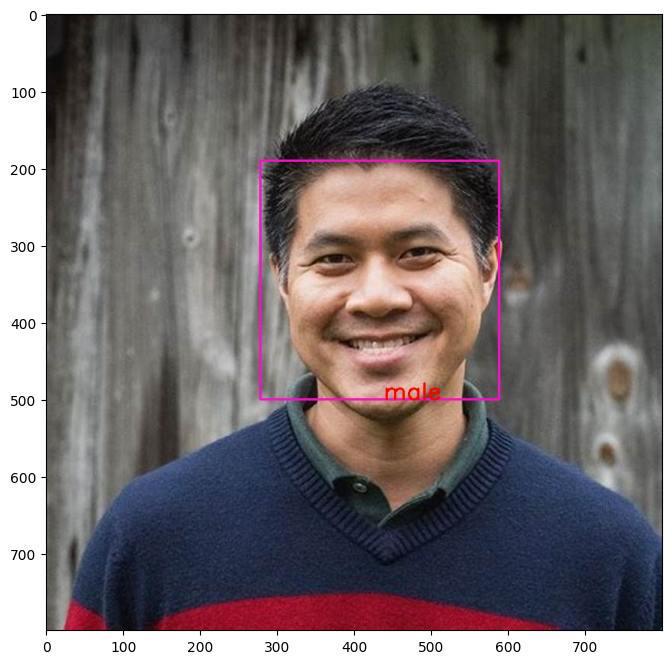

In [ ]:
# làm được hiển thị chữ trên hình

import matplotlib.pyplot as plt
from keras.utils import load_img
from keras.utils.image_utils import img_to_array
import numpy as np
vat = {1: 'female',2:'male'}

test_image = cv2.imread('/content/drive/MyDrive/A_HOC_TAP/Nam_4_Hoc_ky_2/Artificial_Intelligence/Code_AI/projects/test_image/man9.jpeg')
gray = cv2.cvtColor(test_image,cv2.COLOR_BGR2GRAY)
face_cascade = cv2.CascadeClassifier('/content/drive/MyDrive/A_HOC_TAP/Nam_4_Hoc_ky_2/Artificial_Intelligence/Code_AI/projects/haarcascades/haarcascade_frontalface_default.xml')
faces = face_cascade.detectMultiScale(gray, 1.3, 5)

for (x,y,w,h) in faces:
  cv2.rectangle(test_image,(x,y),(x+w,y+h),(203,12,255),2)

  img_gray = gray[(y-10):(y+h+10),(x-10):(x+w+10)]
  cv2.imwrite('/content/drive/MyDrive/A_HOC_TAP/Nam_4_Hoc_ky_2/Artificial_Intelligence/Code_AI/projects/test_image/man9_.jpg',img_gray)
  img = load_img("/content/drive/MyDrive/A_HOC_TAP/Nam_4_Hoc_ky_2/Artificial_Intelligence/Code_AI/projects/test_image/man9_.jpg",target_size=(100,100))
  # img = img_gray
  plt.imshow(img)
  img = img_to_array(img)
  img = img.reshape(1,100,100,3)
  img = img.astype('float64')
  img =img/255
  result  = np.argmax(model.predict(img),axis=1)
  # plt.imshow(cv2.cvtColor(img_gray, cv2.COLOR_BGR2RGB))
  text = str(vat[result[0]])
  cv2.putText(test_image,text,(x+w-150,y+h),cv2.FONT_HERSHEY_SIMPLEX,1,(0,0,255),2)
plt.imshow(cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB))



1/1 [==============================] - 0s 93ms/step


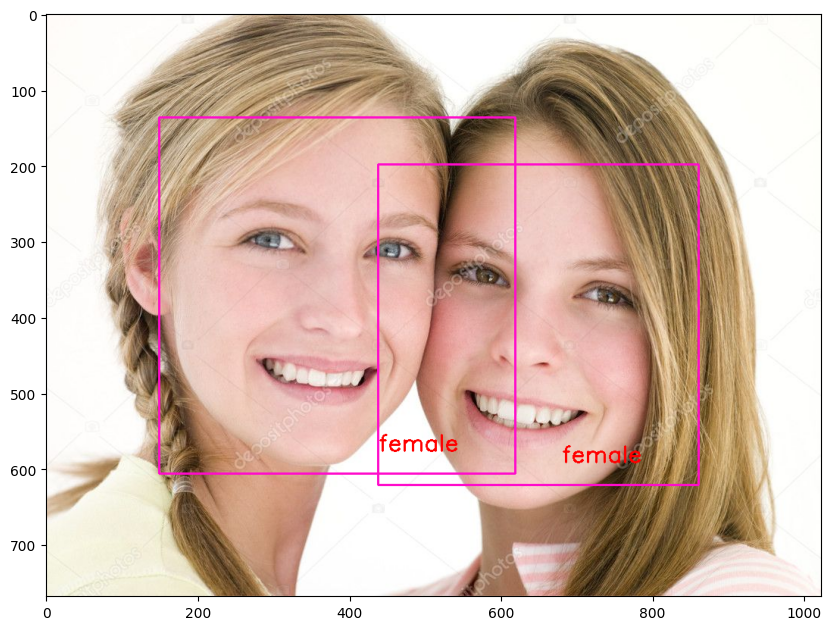

In [ ]:
# multi detect

import matplotlib.pyplot as plt
from keras.utils import load_img
from keras.utils.image_utils import img_to_array
import numpy as np
vat = {1: 'female',2:'male'}

test_image = cv2.imread('/content/drive/MyDrive/A_HOC_TAP/Nam_4_Hoc_ky_2/Artificial_Intelligence/Code_AI/projects/test_image/R.jpeg')
gray = cv2.cvtColor(test_image,cv2.COLOR_BGR2GRAY)
face_cascade = cv2.CascadeClassifier('/content/drive/MyDrive/A_HOC_TAP/Nam_4_Hoc_ky_2/Artificial_Intelligence/Code_AI/projects/haarcascades/haarcascade_frontalface_default.xml')
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
i=0
for (x,y,w,h) in faces:
  cv2.rectangle(test_image,(x-30,y-30),(x+w+30,y+h+30),(203,12,255),2)
  img_gray = gray[(y-50):(y+h+50),(x-50):(x+w+50)]
  cv2.imwrite('/content/drive/MyDrive/A_HOC_TAP/Nam_4_Hoc_ky_2/Artificial_Intelligence/Code_AI/projects/test_image/R_'+str(i)+'.jpg',img_gray)
  img = load_img('/content/drive/MyDrive/A_HOC_TAP/Nam_4_Hoc_ky_2/Artificial_Intelligence/Code_AI/projects/test_image/R_'+str(i)+'.jpg',target_size=(100,100))
  i = i+1
  # img = img_gray
  plt.imshow(img)
  img = img_to_array(img)
  img = img.reshape(1,100,100,3)
  img = img.astype('float64')
  img =img/255
  result  = np.argmax(model.predict(img),axis=1)
  # plt.imshow(cv2.cvtColor(img_gray, cv2.COLOR_BGR2RGB))
  text = str(vat[result[0]])
  cv2.putText(test_image,text,(x+w-150,y+h),cv2.FONT_HERSHEY_SIMPLEX,1,(0,0,255),2)
plt.imshow(cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB))

In [ ]:
# làm được realtime tren VS-code 

!pip install cvlib


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 47.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for cvlib: filename=cvlib-0.2.7-py3-none-any.whl size=10046368 sha256=14768122e553fb7453737313168c05c8df397585bb09288d029d171b88f47e86
  Stored in directory: /root/.cache/pip/wheels/9e/a5/d4/fe37b48fe4f4b621ba5e574a991230070f3cc4f02322a01489
  Created wheel for progressbar: filename=progressbar-2.5-py3-none-any.whl size=12067 sha256=f17bbdd7b8fd3745b7a0ec71818c6ff0acfbb2e19d40111a090a8565185d5fb5
  Stored in directory: /root/.cache/pip/wheels/cd/17/e5/765d1a3112ff3978f70223502f6047e06c43a24d7c5f8ff95b
Successfully built cvlib progressbar
